### Importing Relevant Libraries

In [1]:
import nltk
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# Setting the style of the notebook to be monokai theme  
# This line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

print("Import Complete!")

Import Complete!


### Loading the Data

In [2]:
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [3]:
## Indicating Data Samples per df
# df_true.shape
# df_fake.shape

In [4]:
## Lising Null/Missing elements
# df_true.isnull().sum()
# df_fake.isnull().sum()

In [5]:
## Memory usage for each df
# df_true.info()
# df_fake.info()

### Feature Engineering

In [6]:
# Adding a target class column to indicate whether the news is real or fake
df_true['isfake'] = 0
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  
0  December 31, 2017        0  
1  December 29, 2017        0  
2  December 31, 2017        0  
3  December 30, 2017        0  
4  December 29, 2017        0

In [7]:
df_fake['isfake'] = 1
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isfake  
0  December 31, 2017       1  
1  December 31, 2017       1  
2  December 30, 2017       1  
3  December 29, 2017       1  
4  December 25, 2017       1

In [8]:
# Concatenating to a single df
df = pd.concat([df_true, df_fake]).reset_index(drop=True)
df.shape


(44898, 5)

In [9]:
#Dropping the date column
# df.drop(columns=['date'], inplace=True)
# df.head()

In [10]:
#Combining title and text columns
df['original'] = df['title'] + ' ' + df['text']
# df.head()

In [11]:
# df['original'][0]

In [12]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [13]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text): #Gensim is an NLP library
        
        #Append word, For any word not in stop_words and len greater than 3
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token) 
            
    return result

In [14]:
#Unique words column
df['clean'] = df['original'].apply(preprocess)

In [15]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  \
0  December 31, 2017        0   
1  December 29, 2017        0   
2  December 31, 2017        0   
3  December 30, 2017        0   
4  December 29, 2017        0   

                                            original  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                               clean  
0  [budget, fight, looms, republicans, flip, fisc...  
1  [military, accept, transgender, recruits, mond...  
2  [senior, republican, senator, mueller, washing...  
3  [russia, probe, helped, australian, diplomat, ...  
4  [trump, wants, postal, service, charge, amazon...

In [16]:
list_of_words = []

for i in df['clean']:
    for j in i:
        list_of_words.append(j)

print(f'Total number of words in "df[clean]" are: {len(list_of_words)}')

Total number of words in "df[clean]" are: 9276947


In [17]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
print(f'Total number of Unique words in "df[clean]" are: {total_words}')

Total number of Unique words in "df[clean]" are: 108704


In [18]:
# Creating clean_joined
df['clean_joined']= df['clean'].apply(lambda x:" ".join(x))

### Visualize Cleaned Data

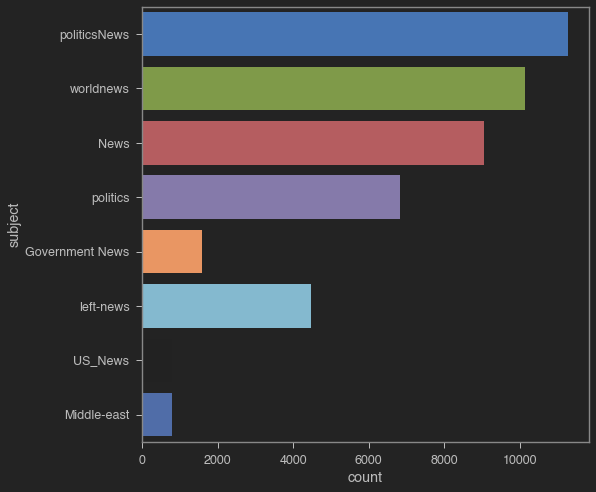

In [19]:
# Plotting the number of samples in 'subject'

plt.figure(figsize = (8, 8))
sns.countplot(y = 'subject', data = df)

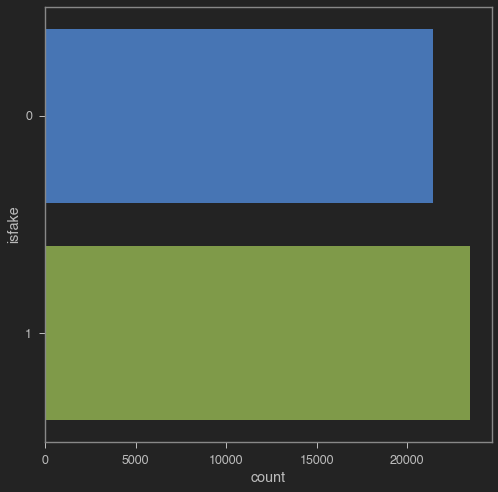

In [20]:
# Plotting the number of samples in 'isfake'

plt.figure(figsize = (8, 8))
sns.countplot(y = 'isfake', data = df)

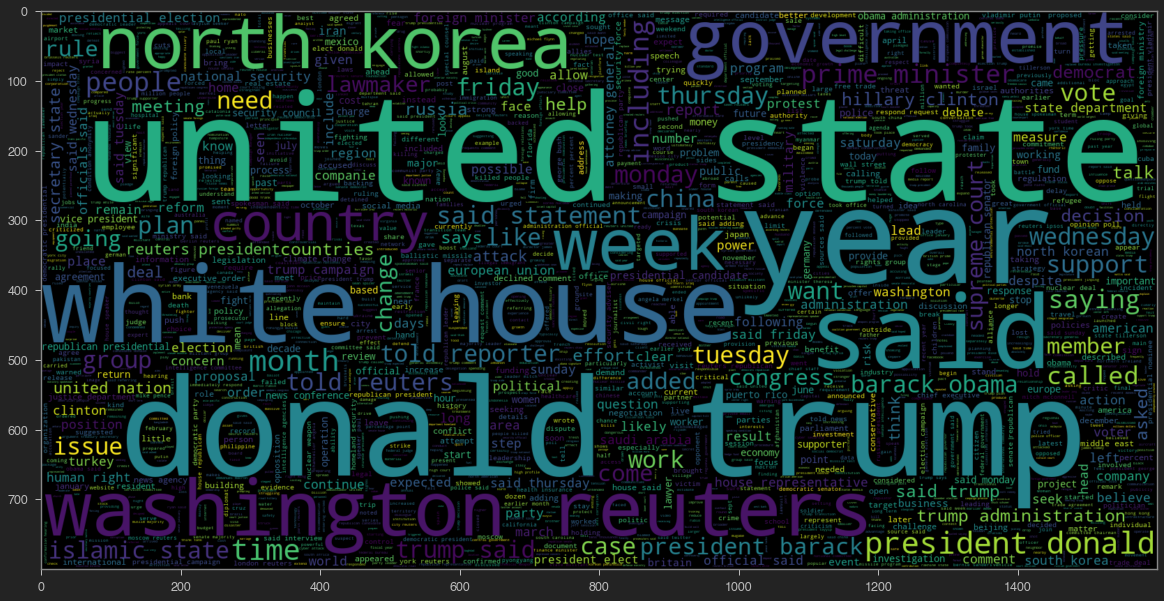

In [21]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

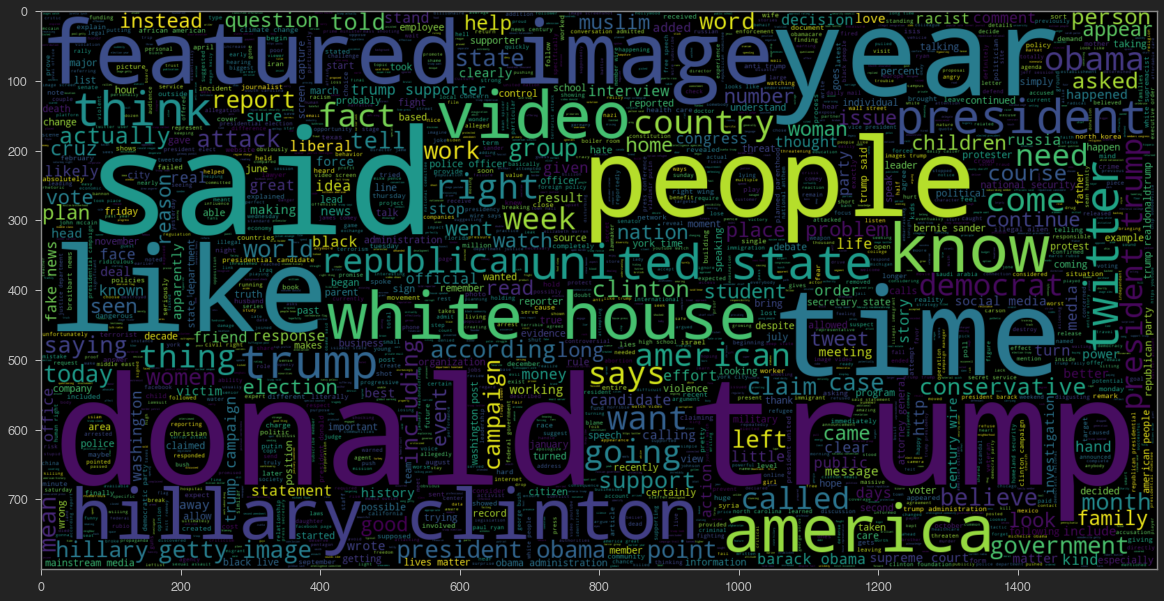

In [22]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [23]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in df.clean_joined:
    #Divide complete sentences into tokens
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [24]:
# visualize the distribution of number of words in a text
import plotly.express as px #Plotly is used to create interactive visualizations
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

### Preparing the Data by Tokenization and Padding

In [25]:
# Splitting the data into test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2) 
#Features are df.clean_joined, Target is df.isfake
#Make sure that the models are able to generalize and not memorize

In [26]:
from nltk import word_tokenize

# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train) #This method creates a vocabulary index based on word frequency (creates word_index)
train_sequences = tokenizer.texts_to_sequences(x_train) #Transforms each text in texts to a sequence of integers from word_index
test_sequences = tokenizer.texts_to_sequences(x_test)

In [27]:
len(train_sequences) #Data divided into 80%

35918

In [28]:
len(test_sequences) #Data divided into 20%

8980

In [29]:
print(f"The encoding for document\n\n\n{df.clean_joined[0]} \n\n\n is :\n\n\n{train_sequences[0]}")

The encoding for document


budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats sa

In [30]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [31]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [   21  2218  5031  3824     1    27   371     1   189   439   555  4137
  1598   755   760    21  2218   929 35060   760 11780   258   749 65099
  1669   975  1394 35060  1340  1039   110   441  2159  1077   755  2159
  1077    57   975  1394]
The padded encoding for document 2  is :  [ 2293  9267   133  1128  2482  8403  3056   490  7367     9  1049  6312
  2482  6055  2141  3003  8306   385   712   490 15179   133   653     3
    28   465 11902  1257   636 11115   490   694   574  2482   569   327
  2367  8709   633 10539]


### Building and Training the model

In [38]:
# Sequential Model
model = Sequential()

# embeddidng layer
# Embedding layers do dimensionality reduction (represent 100,000 variables with 200 variables)

model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 300))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))   # Output is 1 here since we're doing binary classification(0,1)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         13914112  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 14,210,305
Trainable params: 14,210,305
Non-trainable params: 0
_________________________________________________________________


In [33]:
total_words

108704

In [53]:
y_train = np.asarray(y_train)

In [54]:
# Train the model
# Training data further divided into 10% for cross-validation and 90% for training
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2) #padded_train (input), y_train(output)

#If the error on the training & validation data is going DOWN it means the model is GENERALIZING
#If the error on the training data is going DOWN & validation data is going UP it means the model is OVERFITTING




Epoch 1/2
506/506 [==============================] - 179s 354ms/step - loss: 0.0407 - acc: 0.9859 - val_loss: 0.0018 - val_acc: 0.9997
Epoch 2/2
506/506 [==============================] - 170s 336ms/step - loss: 0.0022 - acc: 0.9994 - val_loss: 1.0375e-04 - val_acc: 1.0000


### Assessing Trained Model Performance

In [55]:
# Make prediction
pred = model.predict(padded_test)

In [56]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [57]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction) #Comparing ground_truths with prediction

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9969933184855234


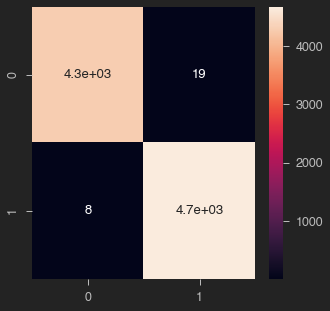

In [60]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True)

In [61]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}